# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_api_key = "9980438bd8bda63633edffe81fce2d82"

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Dependencies
import json
import requests

#URL for GET requests to retrieve data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Print response object
response = requests.get(query_url+'London').json()
display(response)





        

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 70.27,
  'feels_like': 62.64,
  'temp_min': 69.01,
  'temp_max': 71.6,
  'pressure': 1012,
  'humidity': 40},
 'visibility': 10000,
 'wind': {'speed': 11.41, 'deg': 230},
 'clouds': {'all': 100},
 'dt': 1595531420,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1595477495,
  'sunset': 1595534526},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
city_weather = []
counter = 0
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        weather = {"City": response['name'], "Lat": response['coord']['lat'], "Lng": response['coord']['lon'], "Max Temp": response['main']['temp_max'], "Humidity": response['main']['humidity'], "Cloudiness": response['clouds']['all'], "Wind Speed": response['wind']['speed'], "Country": response['sys']['country'], "Date": response['dt']}
        city_weather.append(weather)
        counter = counter + 1
        print(f"{counter} City Name: {response['name']}")
              
    except:
        print("Missing Data for | " + city)

1 City Name: Atuona
2 City Name: Naze
3 City Name: Black River
4 City Name: Mataura
5 City Name: Asilah
6 City Name: Kaitangata
7 City Name: Vaini
8 City Name: Busselton
9 City Name: Constitución
10 City Name: Avarua
11 City Name: Bambous Virieux
12 City Name: Bluff
13 City Name: Te Anau
14 City Name: Mocuba
15 City Name: Upernavik
16 City Name: Rikitea
17 City Name: Sur
18 City Name: Butaritari
19 City Name: Port Alfred
20 City Name: Bredasdorp
21 City Name: Albany
22 City Name: Sitka
Missing Data for | mys shmidta
23 City Name: Tasiilaq
24 City Name: Punta Arenas
25 City Name: East London
26 City Name: Hermanus
27 City Name: Fort Nelson
28 City Name: Pisco
29 City Name: Norman Wells
30 City Name: Bengkulu
31 City Name: Kingston
32 City Name: Sidi Ali
33 City Name: Broken Hill
34 City Name: Hambantota
35 City Name: Arraial do Cabo
36 City Name: Mehamn
37 City Name: Sittwe
38 City Name: Bullhead City
39 City Name: Joensuu
40 City Name: Anandnagar
Missing Data for | mutsamudu
41 City Na

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create Data Frame
weather_df = pd.DataFrame(city_weather)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,78.58,75,0,20.20,PF,1595531996
1,Naze,28.37,129.48,82.40,88,40,8.05,JP,1595531996
2,Black River,18.03,-77.85,87.01,74,75,6.93,JM,1595531996
3,Mataura,-46.19,168.86,39.00,83,100,3.00,NZ,1595531997
4,Asilah,35.47,-6.03,82.40,54,0,8.05,MA,1595531997


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#Humidity Check
humidity_check = weather_df.loc[weather_df['Humidity']>100]
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
# Export the City_Data into a csv
#weather_df.to_csv("city_weath.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Temperature (04/01/20)')

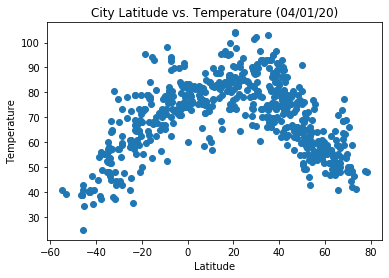

In [33]:
x_axis_temp = weather_df['Lat']
y_axis_temp = weather_df['Max Temp']
plt.scatter(x_axis_temp, y_axis_temp);
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Latitude vs. Temperature (04/01/20)", color="black")


## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (04/01/20)')

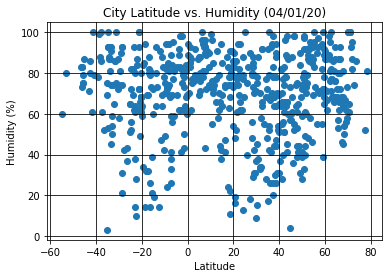

In [32]:
x_axis_hum = weather_df['Lat']
y_axis_hum = weather_df['Humidity']
plt.scatter(x_axis_hum, y_axis_hum);
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="black")
plt.title("City Latitude vs. Humidity (04/01/20)", color="black")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (04/01/20)')

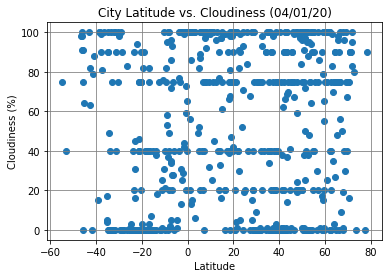

In [31]:
x_axis_cloud = weather_df['Lat']
y_axis_cloud = weather_df['Cloudiness']
plt.scatter(x_axis_cloud, y_axis_cloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="grey")
plt.title("City Latitude vs. Cloudiness (04/01/20)", color="black")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (04/01/20)')

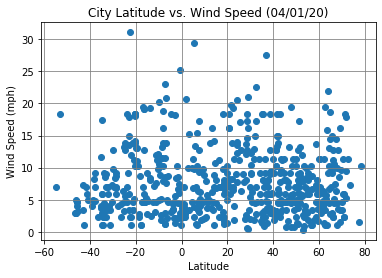

In [30]:
x_axis_wind = weather_df['Lat']
y_axis_wind = weather_df['Wind Speed']
plt.scatter(x_axis_wind, y_axis_wind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(color="grey")
plt.title("City Latitude vs. Wind Speed (04/01/20)", color="black")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [40]:
# Create Northern and Southern Hemisphere DataFrames
northern = pd.DataFrame(weather_df.loc[weather_df['Lat']>=0])
southern = pd.DataFrame(weather_df.loc[weather_df['Lat']<0])

#Checks to make sure DF reads properly
southern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,78.58,75,0,20.20,PF,1595531996
3,Mataura,-46.19,168.86,39.00,83,100,3.00,NZ,1595531997
5,Kaitangata,-46.28,169.85,39.00,73,91,5.01,NZ,1595531997
6,Vaini,-21.20,-175.20,68.00,100,75,3.36,TO,1595531964
7,Busselton,-33.65,115.33,45.00,74,0,3.65,AU,1595531998


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

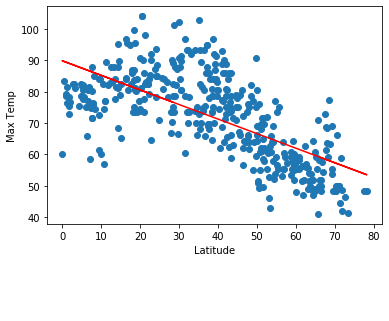

The line equation is y = -0.47x + 89.9
The r value is -0.6739612943198355


In [53]:
x_axis_nor_temp = northern['Lat']
y_axis_nor_temp = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_nor_temp, y_axis_nor_temp)
regress_values_nor_temp = x_axis_nor_temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_nor_temp, y_axis_nor_temp)
plt.plot(x_axis_nor_temp,regress_values_nor_temp,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
print("The line equation is " + str(line_eq))
print("The r value is " + str(rvalue))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

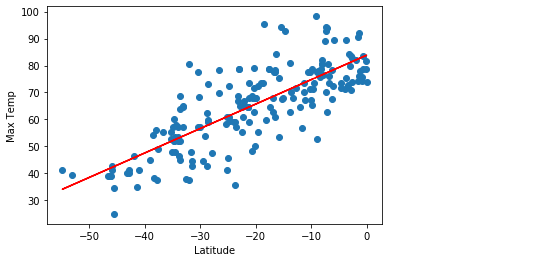

The line equation is y = 0.91x + 83.85
The r value is 0.7899871254518166


In [58]:
x_axis_south_temp = southern['Lat']
y_axis_south_temp = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_temp, y_axis_south_temp)
regress_values_south_temp = x_axis_south_temp * slope + intercept
line_eq_a = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_south_temp, y_axis_south_temp)
plt.plot(x_axis_south_temp,regress_values_south_temp,"r-")
plt.annotate(line_eq_a, (6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
print("The line equation is " + str(line_eq_a))
print("The r value is " + str(rvalue))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

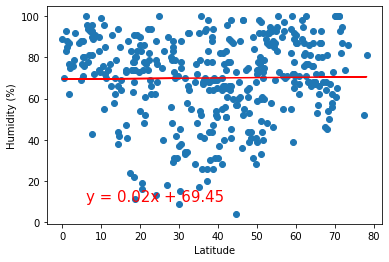

The line equation is y = 0.02x + 69.45
The r value is 0.014824735166277496


In [60]:
x_axis_nor_hum = northern['Lat']
y_axis_nor_hum = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_nor_hum, y_axis_nor_hum)
regress_values_nor_hum = x_axis_nor_hum * slope + intercept
line_eq_b = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_nor_hum, y_axis_nor_hum)
plt.plot(x_axis_nor_hum,regress_values_nor_hum,"r-")
plt.annotate(line_eq_b, (6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print("The line equation is " + str(line_eq_b))
print("The r value is " + str(rvalue))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

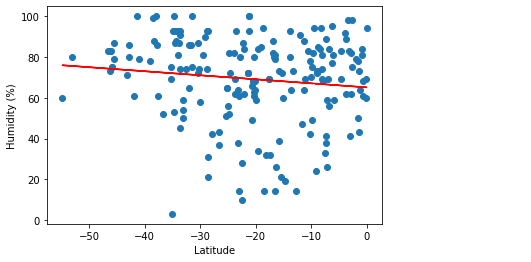

The line equation is y = -0.2x + 65.1
The r value is -0.12179233280506747


In [61]:
x_axis_south_hum = southern['Lat']
y_axis_south_hum = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_hum, y_axis_south_hum)
regress_values_south_hum = x_axis_south_hum * slope + intercept
line_eq_c = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_south_hum, y_axis_south_hum)
plt.plot(x_axis_south_hum,regress_values_south_hum,"r-")
plt.annotate(line_eq_c, (6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print("The line equation is " + str(line_eq_c))
print("The r value is " + str(rvalue))


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

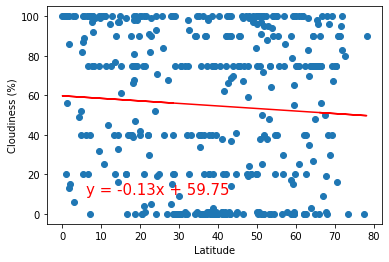

The line equation is y = -0.13x + 59.75
The r value is -0.06607801735678646


In [62]:
x_axis_nor_cloud = northern['Lat']
y_axis_nor_cloud = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_nor_cloud, y_axis_nor_cloud)
regress_values_nor_cloud = x_axis_nor_cloud * slope + intercept
line_eq_d = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_nor_cloud, y_axis_nor_cloud)
plt.plot(x_axis_nor_cloud,regress_values_nor_cloud,"r-")
plt.annotate(line_eq_d, (6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
print("The line equation is " + str(line_eq_d))
print("The r value is " + str(rvalue))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

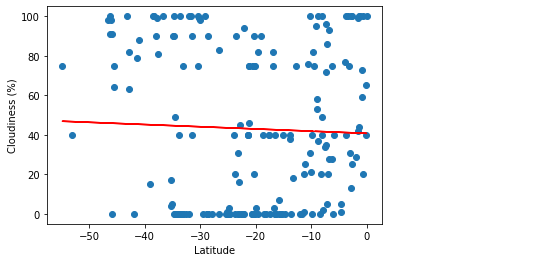

The line equation is y = -0.11x + 40.75
The r value is -0.037681173131852985


In [63]:
x_axis_south_cloud = southern['Lat']
y_axis_south_cloud = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_cloud, y_axis_south_cloud)
regress_values_south_cloud = x_axis_south_cloud * slope + intercept
line_eq_e = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_south_cloud, y_axis_south_cloud)
plt.plot(x_axis_south_cloud,regress_values_south_cloud,"r-")
plt.annotate(line_eq_e, (6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
print("The line equation is " + str(line_eq_e))
print("The r value is " + str(rvalue))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

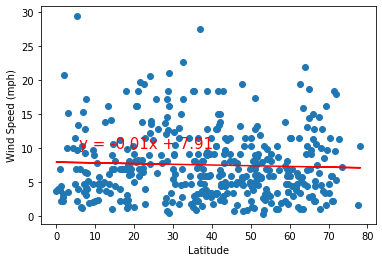

The line equation is y = -0.01x + 7.91
The r value is -0.04214078477684808


In [64]:
x_axis_nor_wind = northern['Lat']
y_axis_nor_wind = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_nor_wind, y_axis_nor_wind)
regress_values_nor_wind = x_axis_nor_wind * slope + intercept
line_eq_f = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_nor_wind, y_axis_nor_wind)
plt.plot(x_axis_nor_wind,regress_values_nor_wind,"r-")
plt.annotate(line_eq_f, (6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print("The line equation is " + str(line_eq_f))
print("The r value is " + str(rvalue))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

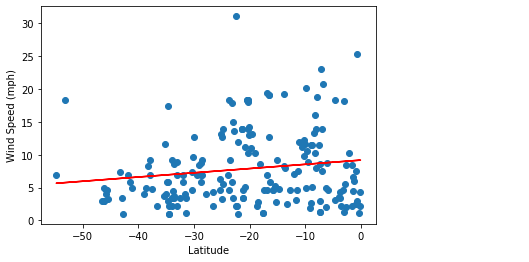

The line equation is y = 0.06x + 9.19
The r value is 0.14988840739496426


In [65]:
x_axis_south_wind = southern['Lat']
y_axis_south_wind = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_wind, y_axis_south_wind)
regress_values_south_wind = x_axis_south_wind * slope + intercept
line_eq_g = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_south_wind, y_axis_south_wind)
plt.plot(x_axis_south_wind,regress_values_south_wind,"r-")
plt.annotate(line_eq_g, (6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print("The line equation is " + str(line_eq_g))
print("The r value is " + str(rvalue))